In [189]:
# Libraries
library(plyr)
library(dplyr)
library(ggplot2)

### Read crime statistics for San Francisco

In [190]:
data_sf <- read.table("../sanfrancisco_incidents_summer_2014.csv", stringsAsFactors=FALSE, sep = ",", header = TRUE)

In [191]:
head(data_sf)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
1,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405646994567,37.7383221869053,"(37.7383221869053, -122.405646994567)",14073431126031
2,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012093789,37.7617677182954,"(37.7617677182954, -122.435012093789)",14073631771000
3,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795194505,37.7800356268394,"(37.7800356268394, -122.409795194505)",14617792306244
4,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485262988324,37.7725176473142,"(37.7725176473142, -122.485262988324)",14617753106244
5,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895418239,37.7723131976814,"(37.7723131976814, -122.509895418239)",14073422072000
6,140734349,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578493475,37.773907074489,"(37.773907074489, -122.416578493475)",14073434916010


### Number of incidents by category

Use dplyr functions to summarize data by category and derive count of top 10 incident categories

In [192]:
# Count by category
sf_topN <- data_sf %>%
    group_by(Category) %>%
    summarise(cnt=n()) %>%
    select(Category, cnt) %>%
    arrange(desc(cnt)) %>%
    head(10)

In [193]:
sf_topN

,Category,cnt
1,LARCENY/THEFT,9466
2,OTHER OFFENSES,3567
3,NON-CRIMINAL,3023
4,ASSAULT,2882
5,VEHICLE THEFT,1966
6,WARRANTS,1782
7,DRUG/NARCOTIC,1345
8,SUSPICIOUS OCC,1300
9,MISSING PERSON,1266
10,SECONDARY CODES,442


### Plot frequency of crimes by category
#### Larceny/Theft is by far the most frequently reported category

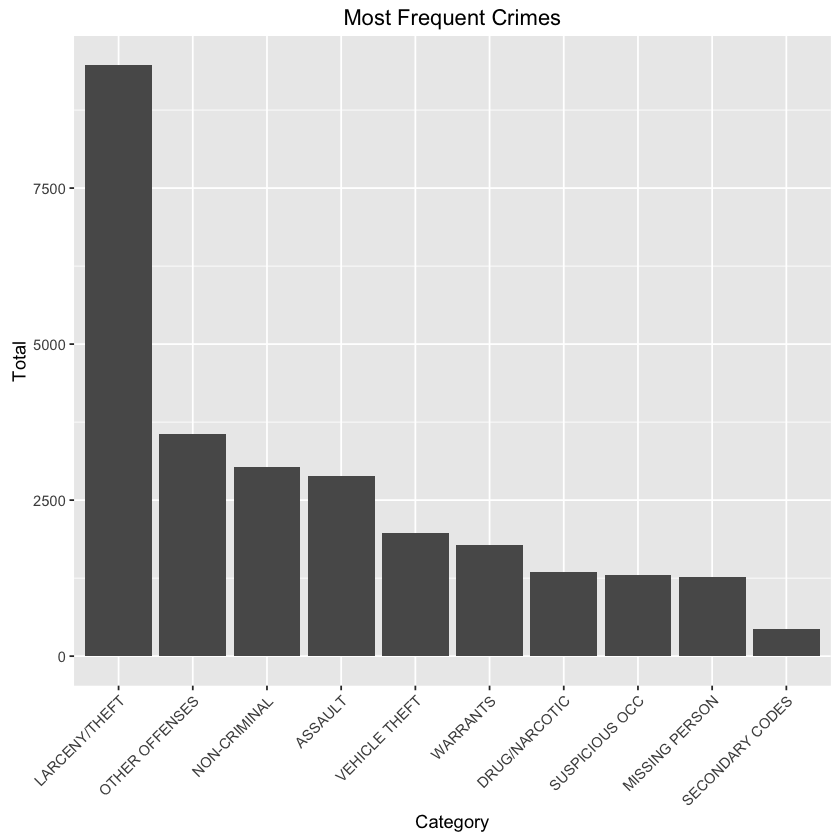

In [194]:
ggplot(sf_topN, aes(x = reorder(Category, -cnt), y = cnt)) + 
    geom_bar(stat = "identity") +
    xlab("Category") + 
    ylab("Total") + 
    theme(axis.text.x = element_text(angle=45, hjust=1)) + 
    ggtitle("Most Frequent Crimes")

### Incident by District
The SOUTHERN district has the greatest number of incidents (over 5700), trailed by MISSION, NORTHERN, and CENTRAL with approximately 3500 incidents each for the period of 06/01/2014 through 08/31/2014.

In [195]:
# Incident count by District
sf_incident_by_district <- data_sf %>%
    group_by(PdDistrict) %>%
    summarise(cnt=n()) %>%
    select(PdDistrict, cnt) %>%
    arrange(desc(cnt)) 

In [196]:
sf_incident_by_district

,PdDistrict,cnt
1,SOUTHERN,5739
2,MISSION,3700
3,NORTHERN,3589
4,CENTRAL,3513
5,BAYVIEW,2725
6,INGLESIDE,2378
7,TENDERLOIN,2257
8,TARAVAL,1853
9,PARK,1693
10,RICHMOND,1546


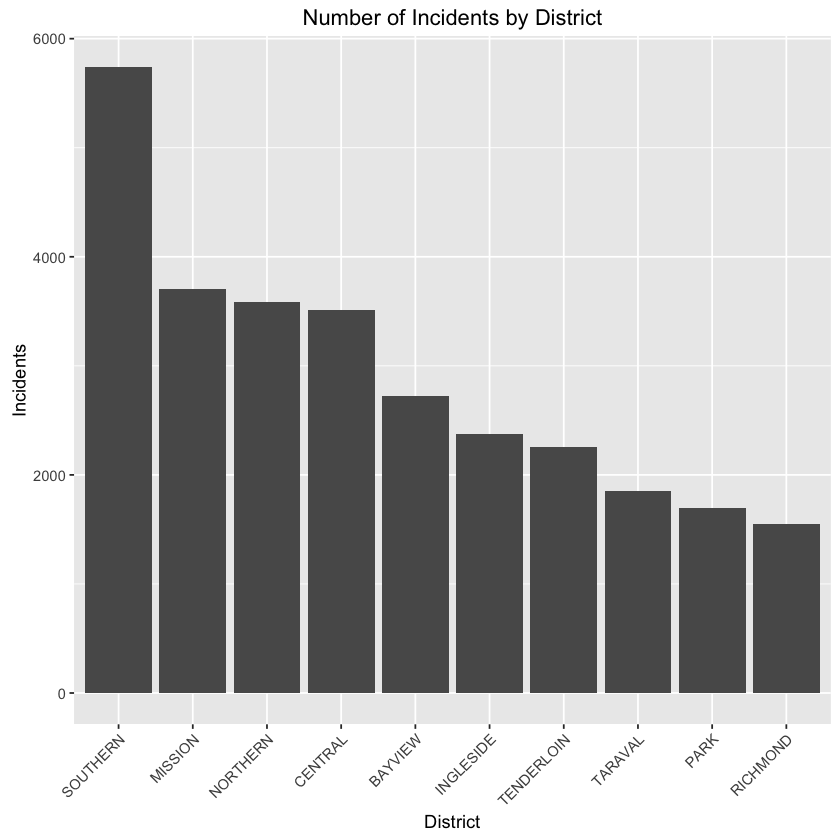

In [197]:
ggplot(sf_incident_by_district, aes(x = reorder(PdDistrict, -cnt), y = cnt)) + 
    geom_bar(stat = "identity") +
    xlab("District") + 
    ylab("Incidents") + 
    theme(axis.text.x = element_text(angle=45, hjust=1)) + 
    ggtitle("Number of Incidents by District")

### Incidents by District and Category
Reviewing the data by District and Category a similar pattern is revealed in the two graphs below. Once again LARCENY/THEFT occurs most often, is the generally the largest percentage, and with the most incidents occurring in the SOUTHERN district. 

In [198]:
## Incident count by District and Category
sf_topN_by_district <- data_sf %>%
    group_by(PdDistrict, Category) %>%
    summarise(cnt=n()) %>%
    #select(Category, PdDistrict, cnt) %>%
    filter(Category %in% c("LARCENY/THEFT", "OTHER OFFENSES", "NON-CRIMINAL", "ASSAULT", "VEHICLE THEFT", "WARRANTS", "DRUG/NARCOTIC", "SUSPICIOUS OCC", "MISSING PERSON", "SECONDARY CODES")) %>% 
    arrange(PdDistrict, desc(cnt)) %>%
    head(100)

In [199]:
head(sf_topN_by_district, 15)

,PdDistrict,Category,cnt
1,BAYVIEW,LARCENY/THEFT,481
2,BAYVIEW,OTHER OFFENSES,435
3,BAYVIEW,ASSAULT,359
4,BAYVIEW,WARRANTS,249
5,BAYVIEW,VEHICLE THEFT,245
6,BAYVIEW,NON-CRIMINAL,203
7,BAYVIEW,SUSPICIOUS OCC,171
8,BAYVIEW,MISSING PERSON,141
9,BAYVIEW,DRUG/NARCOTIC,111
10,BAYVIEW,SECONDARY CODES,76


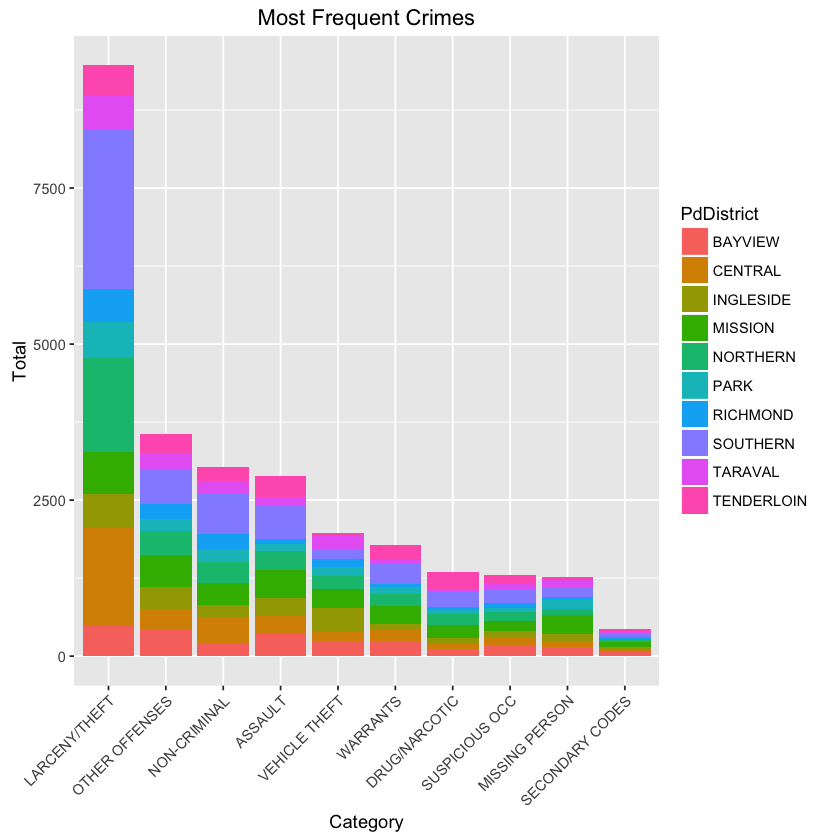

In [200]:
ggplot(sf_topN_by_district, aes(x = reorder(Category, -cnt), y = cnt, fill=PdDistrict)) + 
    geom_bar(stat="identity") +
    xlab("Category") + 
    ylab("Total") + 
    theme(axis.text.x = element_text(angle=45, hjust=1)) + 
    ggtitle("Most Frequent Crimes")

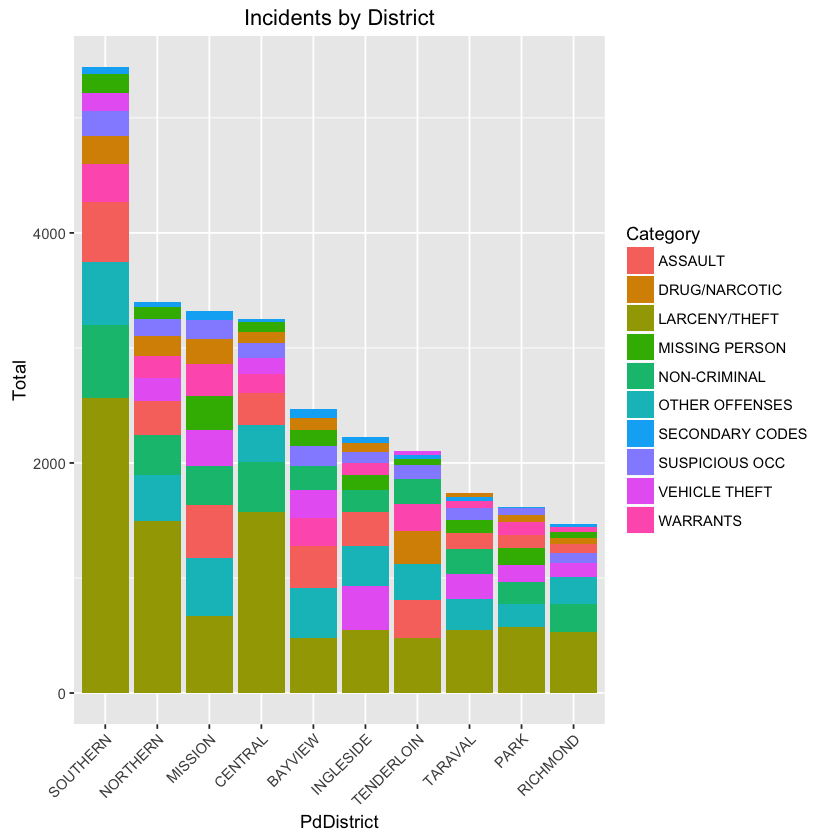

In [201]:
ggplot(sf_topN_by_district, aes(x = reorder(PdDistrict, -cnt), y = cnt, fill=Category)) + 
    geom_bar(stat="identity") +
    xlab("PdDistrict") + 
    ylab("Total") + 
    theme(axis.text.x = element_text(angle=45, hjust=1)) + 
    ggtitle("Incidents by District")

### Distribution of Crime Incidents
The Category LARCNEY/THEFT occurs most often as noted earlier and also has the greatest dispersion, often apparently spiking to very high values and then stabilizing to a median of about 5,000 incidents. 

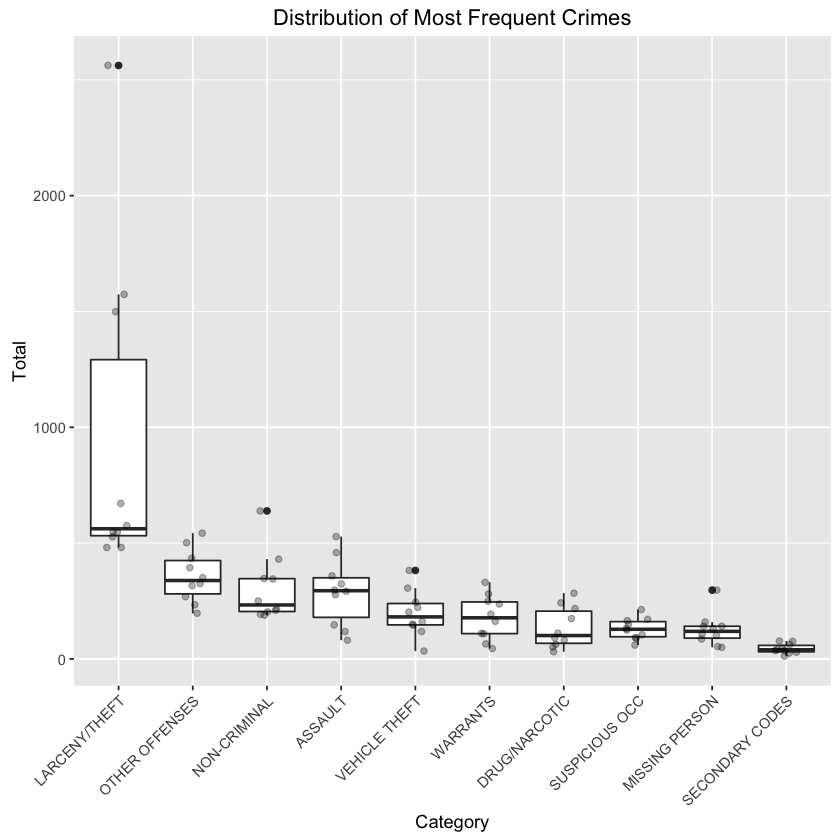

In [202]:
ggplot(sf_topN_by_district, aes(x = reorder(Category, -cnt), y = cnt)) +
    geom_boxplot() +
    geom_jitter(width=0.4, alpha=0.3) +
    xlab("Category") + 
    ylab("Total") + 
    theme(axis.text.x = element_text(angle=45, hjust=1)) + 
    ggtitle("Distribution of Most Frequent Crimes")

### Further Analysis
Two addional columns were introduced into the main dataframe: Weekend and Hour. The Weekend column is derived as a Boolean flag from a DayOfWeek value equal to Saturday or Sunday. The Hour column captures the the first two characters of the Time column, droping the minute value. These values are used in the final plot to visualize data distributions by District and top 10 incident categories.

The Distribution of Incidents by District and Category below show a general tendency for incidents to spike during evening hours and on weekends. 

Once again the LARCENY/THEFT Category leads all other categories with a clear bump on weekends.

In [203]:
## add column to flag weekend dates
data_sf$Weekend <- data_sf$DayOfWeek %in% c("Saturday", "Sunday")

In [204]:
data_sf$Hour <- substring(data_sf$Time, 1, 2)

In [205]:
head(data_sf)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Weekend,Hour
1,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405646994567,37.7383221869053,"(37.7383221869053, -122.405646994567)",14073431126031,TRUE,23
2,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012093789,37.7617677182954,"(37.7617677182954, -122.435012093789)",14073631771000,TRUE,23
3,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795194505,37.7800356268394,"(37.7800356268394, -122.409795194505)",14617792306244,TRUE,23
4,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485262988324,37.7725176473142,"(37.7725176473142, -122.485262988324)",14617753106244,TRUE,23
5,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895418239,37.7723131976814,"(37.7723131976814, -122.509895418239)",14073422072000,TRUE,23
6,140734349,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578493475,37.773907074489,"(37.773907074489, -122.416578493475)",14073434916010,TRUE,23


In [206]:
sf_topN_by_district <- data_sf %>%
    group_by(PdDistrict, Category, Weekend) %>%
    summarise(cnt=n()) %>%
    #select(Category, PdDistrict, cnt) %>%
    filter(Category %in% c("LARCENY/THEFT", "OTHER OFFENSES", "NON-CRIMINAL", "ASSAULT", "VEHICLE THEFT", "WARRANTS", "DRUG/NARCOTIC", "SUSPICIOUS OCC", "MISSING PERSON", "SECONDARY CODES")) %>% 
    arrange(PdDistrict, Weekend, desc(cnt))

In [207]:
head(sf_topN_by_district, 15)

,PdDistrict,Category,Weekend,cnt
1,BAYVIEW,ASSAULT,FALSE,256
2,BAYVIEW,ASSAULT,TRUE,103
3,BAYVIEW,DRUG/NARCOTIC,FALSE,81
4,BAYVIEW,DRUG/NARCOTIC,TRUE,30
5,BAYVIEW,LARCENY/THEFT,FALSE,346
6,BAYVIEW,LARCENY/THEFT,TRUE,135
7,BAYVIEW,MISSING PERSON,FALSE,103
8,BAYVIEW,MISSING PERSON,TRUE,38
9,BAYVIEW,NON-CRIMINAL,FALSE,153
10,BAYVIEW,NON-CRIMINAL,TRUE,50


In [208]:
data_sf_by_time <- data_sf %>%
    group_by(Category, PdDistrict, Hour, Weekend) %>%
    filter(Category %in% c("LARCENY/THEFT", "OTHER OFFENSES", "NON-CRIMINAL", "ASSAULT", "VEHICLE THEFT", "WARRANTS", "DRUG/NARCOTIC", "SUSPICIOUS OCC", "MISSING PERSON", "SECONDARY CODES")) %>% 
    summarise(cnt=n()) #%>%
    #select(Category, PdDistrict, cnt) %>%
    #arrange(Category, Time, desc(cnt))

In [209]:
head(data_sf_by_time, 15)

,Category,PdDistrict,Hour,Weekend,cnt
1,ASSAULT,BAYVIEW,00,FALSE,17
2,ASSAULT,BAYVIEW,00,TRUE,11
3,ASSAULT,BAYVIEW,01,FALSE,7
4,ASSAULT,BAYVIEW,01,TRUE,4
5,ASSAULT,BAYVIEW,02,FALSE,8
6,ASSAULT,BAYVIEW,02,TRUE,5
7,ASSAULT,BAYVIEW,03,FALSE,7
8,ASSAULT,BAYVIEW,03,TRUE,1
9,ASSAULT,BAYVIEW,04,FALSE,2
10,ASSAULT,BAYVIEW,05,TRUE,3


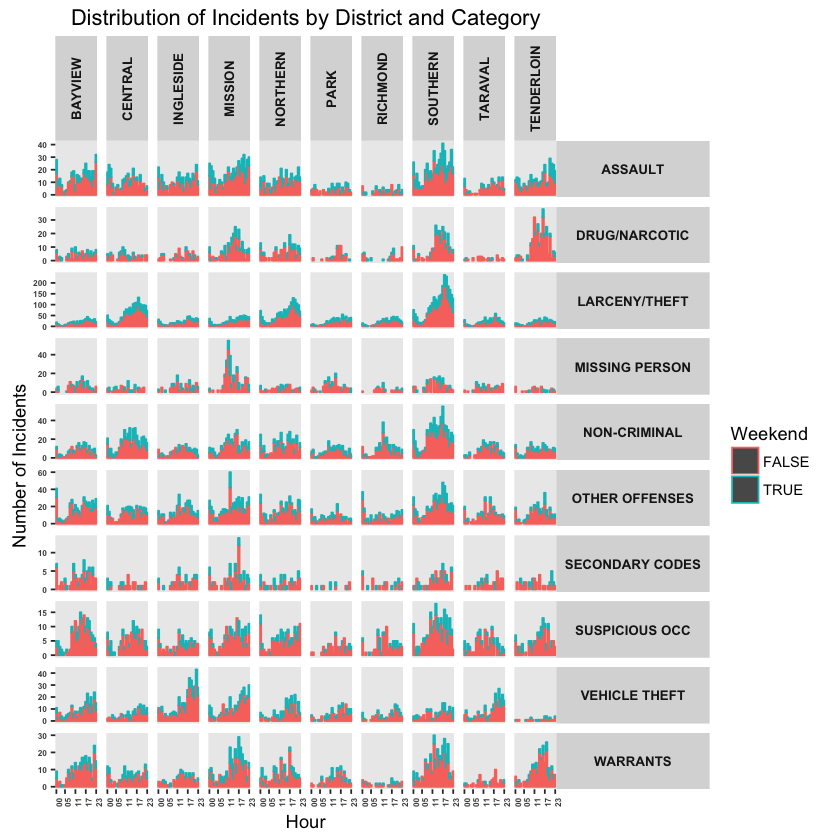